Day 6: 

Topic: Imaging Problem 

Resources: 
1. Fashion MNIST with Keras and Deep Learning https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/

2. How to develop a CNN from scratch for fashion MNIST http://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

3. Fashion MNIST: https://www.tensorflow.org/datasets/catalog/fashion_mnist

4. An Efficient Deep Learning Approach to Pneumonia Classification in Healthcare: https://www.hindawi.com/journals/jhe/2019/4180949/

5. Deep Learning for Detecting Pneumonia from X-ray Images: https://towardsdatascience.com/deep-learning-for-detecting-pneumonia-from-x-ray-images-fc9a3d9fdba8


Data set:
For beginners: https://www.kaggle.com/zalando-research/fashionmnist

# Fashion MNIST with Keras
## Overview
Fashion MNIST is an MNIST like dataset using images of clothing instead of hand-written digits. Each photo is 28x28 grayscale, with 10 different classes. The dataset contains 70000 images with 60000 for training and 10000 for testing.

In [2]:
# !pip install kaggle
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [3]:
!ls -la

total 205296
drwxr-xr-x 1 root root      4096 Mar 28 08:55  .
drwxr-xr-x 1 root root      4096 Mar 28 07:36  ..
drwxr-xr-x 3 root root      4096 Mar 28 07:47 '{'
drwxr-xr-x 1 root root      4096 Mar 25 16:11  .config
-rw-r--r-- 1 root root  22176691 Sep 21  2019  fashion-mnist_test.csv
-rw-r--r-- 1 root root 133047193 Sep 21  2019  fashion-mnist_train.csv
drwxr-xr-x 2 root root      4096 Mar 28 07:45  .kaggle
drwxr-xr-x 4 root root      4096 Mar 28 08:55 'logs\cnn_1layer'
drwxr-xr-x 1 root root      4096 Mar 18 16:23  sample_data
-rw-r--r-- 1 root root   7840016 Sep 21  2019  t10k-images-idx3-ubyte
-rw-r--r-- 1 root root     10008 Sep 21  2019  t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root  47040016 Sep 21  2019  train-images-idx3-ubyte
-rw-r--r-- 1 root root     60008 Sep 21  2019  train-labels-idx1-ubyte


In [0]:
import json
token = {"username":"altafshaikh","key":"e4a7d1a5b1ac792fe0a1d2f4ad2017ef"}
with open('.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp .kaggle/kaggle.json ~/.kaggle/

In [14]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d zalando-research/fashionmnist

ERROR! Session/line number was not unique in database. History logging moved to new session 61
 95% 65.0M/68.8M [00:00<00:00, 64.9MB/s]
100% 68.8M/68.8M [00:00<00:00, 77.1MB/s]


In [0]:
import os
import gc
import glob

In [5]:
files = glob.glob("*.zip")
files

[]

In [30]:
!unzip {/content}/datasets/zalando-research/fashionmnist/fashionmnist.zip


Archive:  {/content}/datasets/zalando-research/fashionmnist/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [35]:
!ls

'{'			   sample_data		    train-images-idx3-ubyte
 fashion-mnist_test.csv    t10k-images-idx3-ubyte   train-labels-idx1-ubyte
 fashion-mnist_train.csv   t10k-labels-idx1-ubyte


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
# train and test dataframe
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv('fashion-mnist_test.csv')

In [8]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

# for train data
x_train = train_data[:, 1:] / 255  #except first_col take all cols and rows
y_train = train_data[:, 0]   #take only first_col and all rows==> labels

# for test data
x_test = test_data[:, 1:] / 255  # normalizing the data = > range(0-1)
y_test = test_data[:, 0]

In [0]:
# split the training data into train and validate arrays
# test_size => 20% for validation

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [11]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 784)
x_test shape: (10000, 784)
x_validate shape: (12000, 784)


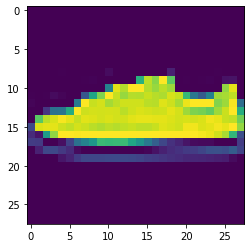

In [12]:
# lets see what the images look like
# reshape => to convert the sixple into the image
# img size = > 28 x 28

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

## Steps to create the CNN


*   Define the model
*   Compile the model
*   Fit the model

In [13]:
# define the shape of the img

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [14]:
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta

In [0]:
# Defining the model

# 1-layer cnn

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=im_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [0]:
# our 3 models 

name = '1_Layer'
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=im_shape, name='Conv2D-1'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name=name)

name = '2_Layer'
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=im_shape, name='Conv2D-1'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=im_shape, name='Conv2D-2'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name=name)

name='3_layer'
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=im_shape, name='Conv2D-2'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=im_shape, name='Conv2D-3'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
], name=name)

cnn_models = [model1, model2, model3]

In [70]:
# the model summaries

for model in cnn_models:
    model.summary()

Model: "1_Layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                173088    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_____________________________________________________

## lets train our 3 model 

In [71]:
# train the models and save results to a dict

history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Epoch 1/50
94/94 [==============================] - 18s 190ms/step - loss: 0.7707 - accuracy: 0.7339 - val_loss: 0.5103 - val_accuracy: 0.8143
Epoch 2/50
94/94 [==============================] - 18s 189ms/step - loss: 0.4539 - accuracy: 0.8408 - val_loss: 0.4042 - val_accuracy: 0.8597
Epoch 3/50
94/94 [==============================] - 18s 189ms/step - loss: 0.4024 - accuracy: 0.8583 - val_loss: 0.3818 - val_accuracy: 0.8679
Epoch 4/50
94/94 [==============================] - 18s 189ms/step - loss: 0.3663 - accuracy: 0.8721 - val_loss: 0.3481 - val_accuracy: 0.8786
Epoch 5/50
94/94 [==============================] - 18s 191ms/step - loss: 0.3459 - accuracy: 0.8792 - val_loss: 0.3267 - val_accuracy: 0.8857
Epoch 6/50
94/94 [==============================] - 18s 193ms/step - loss: 0.3271 - accuracy: 0.8856 - val_loss: 0.3287 - val_accuracy: 0.8794
Epoch 7/50
94/94 [==============================] - 18s 192ms/step - loss: 0.3167 - accuracy: 0.8879 - val_loss: 0.3150 - val_accuracy: 0.8898

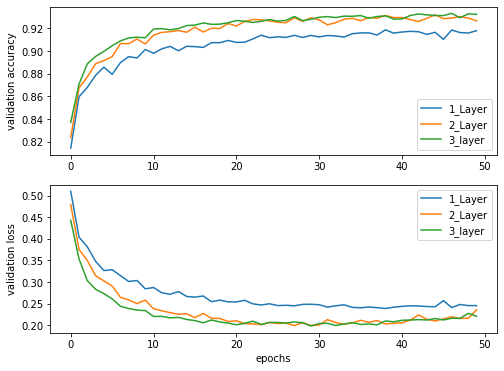

In [73]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_accuracy']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

Predicting...


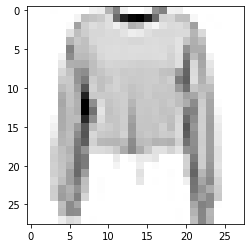


0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Prediction from model 1 ==> 6
Prediction from model 2 ==> 2
Prediction from model 3 ==> 2


In [88]:
# Making Prediction from the train model
print("Predicting...")
image = x_test[50, :].reshape((28, 28))
plt.imshow(image, cmap="Greys")
plt.show()


pred1 = model1.predict(x_test[50, :].reshape(1,28, 28,1))
pred2 = model2.predict(x_test[50, :].reshape(1,28, 28,1))
pred3 = model3.predict(x_test[50, :].reshape(1,28, 28,1))

labels_data = """
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
"""

print(labels_data)

print("Prediction from model 1 ==>", pred1.argmax())
print("Prediction from model 2 ==>", pred2.argmax())
print("Prediction from model 3 ==>", pred3.argmax())


Predicting...


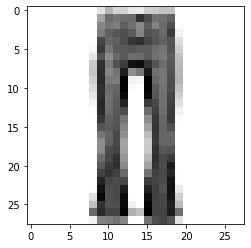


0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Prediction from model 1 ==> 1
Prediction from model 2 ==> 1
Prediction from model 3 ==> 1


In [89]:
print("Predicting...")
image = x_test[65, :].reshape((28, 28))
plt.imshow(image, cmap="Greys")
plt.show()


pred1 = model1.predict(x_test[65, :].reshape(1,28, 28,1))
pred2 = model2.predict(x_test[65, :].reshape(1,28, 28,1))
pred3 = model3.predict(x_test[65, :].reshape(1,28, 28,1))

labels_data = """
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
"""

print(labels_data)

print("Prediction from model 1 ==>", pred1.argmax())
print("Prediction from model 2 ==>", pred2.argmax())
print("Prediction from model 3 ==>", pred3.argmax())

In [85]:
score = model1.evaluate(x_test, y_test, verbose=0)

print('model 1 test loss: {:.4f}'.format(score[0]))
print(' model 1 test acc: {:.4f}'.format(score[1]))

model 1 test loss: 0.2415
 model 1 test acc: 0.9173


In [86]:
score = model2.evaluate(x_test, y_test, verbose=0)

print('model 2 test loss: {:.4f}'.format(score[0]))
print(' model 2 test acc: {:.4f}'.format(score[1]))

model 2 test loss: 0.2385
 model 2 test acc: 0.9271


In [87]:
score = model3.evaluate(x_test, y_test, verbose=0)

print('model 3 test loss: {:.4f}'.format(score[0]))
print(' model 3 test acc: {:.4f}'.format(score[1]))

model 3 test loss: 0.2168
 model 3 test acc: 0.9370


In [18]:
# tensorboard setting

log_dir=r'logs\{}'.format('cnn_1layer')
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, 
    histogram_freq=1,
    write_graph=True,
    write_grads=True,
    write_images=True,
)


In [0]:
# compiling the model

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [79]:
## fitting the model

model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
94/94 [==============================] - 84s 892ms/step - loss: 0.1138 - accuracy: 0.9570 - val_loss: 0.2183 - val_accuracy: 0.9317
Epoch 2/10
94/94 [==============================] - 84s 895ms/step - loss: 0.1083 - accuracy: 0.9584 - val_loss: 0.2254 - val_accuracy: 0.9317
Epoch 3/10
94/94 [==============================] - 84s 892ms/step - loss: 0.1087 - accuracy: 0.9585 - val_loss: 0.2185 - val_accuracy: 0.9333
Epoch 4/10
94/94 [==============================] - 84s 892ms/step - loss: 0.1019 - accuracy: 0.9610 - val_loss: 0.2193 - val_accuracy: 0.9324
Epoch 5/10
94/94 [==============================] - 84s 893ms/step - loss: 0.1052 - accuracy: 0.9602 - val_loss: 0.2170 - val_accuracy: 0.9308
Epoch 6/10
94/94 [==============================] - 84s 892ms/step - loss: 0.1046 - accuracy: 0.9604 - val_loss: 0.2240 - val_accuracy: 0.9297
Epoch 7/10
94/94 [==============================] - 84s 889ms/step - loss: 0.1000 - accuracy: 0.9619 - val_loss: 0.2286 - val_accuracy: 0.9313

In [74]:
!ls 'logs\cnn_1layer'

train  validation


In [66]:
score = model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.3027
 test acc: 0.8966


In [0]:
%load_ext tensorboard

In [0]:
# %tensorboard --logdir 'logs\cnn_1layer'

Projection

In [0]:
from tensorboard.plugins import projector


In [0]:
# %reload_ext tensorboard

In [0]:
# import the data and split into X and Y

pro_test_data = np.array(train_df, dtype='float32')

embed_count = 1600
pro_x_test = pro_test_data[:embed_count, 1:] / 255
pro_y_test = pro_test_data[:embed_count, 0]

pro_logdir = './logs' 

In [0]:
!mkdir logs

In [77]:
!ls 

'{'			  'logs\cnn_1layer'	    train-images-idx3-ubyte
 fashion-mnist_test.csv    sample_data		    train-labels-idx1-ubyte
 fashion-mnist_train.csv   t10k-images-idx3-ubyte
 logs			   t10k-labels-idx1-ubyte


In [0]:
embedding_var = tf.Variable(pro_x_test, name='fmnist_embedding')

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = os.path.join(pro_logdir, 'metadata.tsv')
embedding.sprite.image_path = os.path.join(pro_logdir, 'sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

projector.visualize_embeddings(pro_logdir, config)


In [24]:
embedding

tensor_name: "fmnist_embedding:0"

In [0]:
# # run the sesion to create the model check point

# g_1 = tf.Graph()
# with g_1.as_default():
#   with tf.compat.v1.Session(g_1) as sesh:
#       sesh.run(tf.compat.v1.global_variables_initializer())
#       saver = tf.compat.v1.train.Saver([sesh, os.path.join(pro_logdir, 'model.ckpt')])
#       # saver.save()

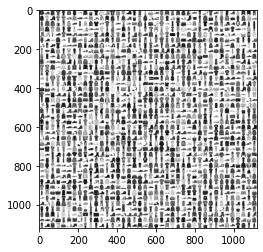

In [55]:
# create the sprite image and the metadata file

rows = 28
cols = 28

label = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

sprite_dim = int(np.sqrt(pro_x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        labels.append(label[int(pro_y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = pro_x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1
        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()

In [62]:
!ls 'logs'

metadata.tsv  projector_config.pbtxt  sprite.png


In [0]:
%tensorboard --logdir '/content/logs'

In [0]:
# import tensorflow as tf
# tf.reset_default_graph()